In [1]:
using ProgressMeter, JLD, Statistics, MAT, Plots

fileIn = matopen("i140703-001_lfp-spikes.mat")
Data = read(fileIn)
close(fileIn)

In [ ]:
events = Data["block"]["segments"][1]["events"][1]

TS_ON = events["times"][findall(x -> x == "65296", events["labels"])] ./ 30000
WS_ON = events["times"][findall(x -> x == "65360", events["labels"])][1:2:end] ./ 30000
CUE_ON = events["times"][findall(x -> x == "65365" || x == "65370", events["labels"])] ./ 30000
CUE_OFF = events["times"][findall(x -> x == "65360", events["labels"])][2:2:end] ./ 30000
GO_ON = events["times"][findall(x -> x == "65369" || x == "65366", events["labels"])] ./ 30000
SR = events["times"][findall(x -> x == "65385" || x == "65382", events["labels"])] ./ 30000
RW_ON = events["times"][findall(x -> x == "65509" || x == "65514", events["labels"])] ./ 30000
GO_RW_OFF = events["times"][findall(x -> x == "65376", events["labels"])] ./ 30000
STOP = events["times"][findall(x -> x == "65312", events["labels"])] ./ 30000
spiketrains = [Data["block"]["segments"][1, 1]["spiketrains"][i]["times"][:] for i ∈ 1:271] / 30000

In [ ]:
cutspiketrains = []
for i ∈ 1:271
    for j ∈ 1:length(TS_ON)-1
        indices = findall(x -> x > [[0.0]; TS_ON][j] && x < [[0.0]; TS_ON][j+1], spiketrains[i])
        push!(cutspiketrains, [(i, spiketrains[i][n] - TS_ON[j]) for n ∈ indices]...)
    end
end

save("cutspiketrains.jld", "cutspiketrains", cutspiketrains)

cutspiketrains

In [19]:
# spiketraintrials = []

# for i ∈ 1:length(TS_ON)
#     tineurons = []
#     for j ∈ 1:271
#         indices = findall(x -> x > [[0.0]; TS_ON][i] && x < [[0.0]; TS_ON][i+1], spiketrains[j])
#         push!(tineurons, spiketrains[j][indices])
#     end
#     push!(spiketraintrials, tineurons)
# end

WS_ON_trials = []

for i ∈ 1:length(TS_ON)-1
    indices = findall(x -> x > TS_ON[i] && x < TS_ON[i+1], WS_ON)
    tineurons = []
    for j ∈ 1:271
        push!(tineurons, WS_ON[indices] .- TS_ON[i]...)
    end
    push!(WS_ON_trials, tineurons)
end

cut_WS_ON

LoadError: UndefVarError: cut_WS_ON not defined

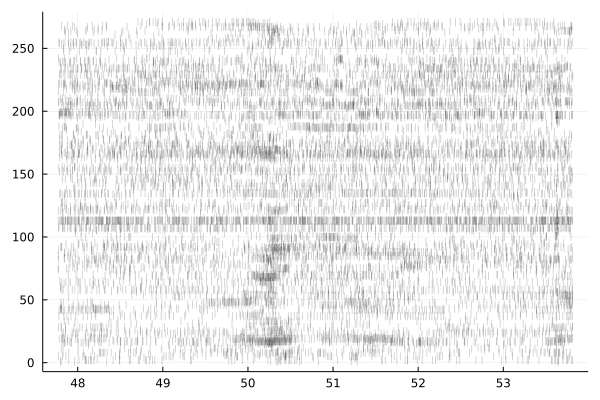

In [18]:
plot()
for i ∈ 1:271
    scatter!(spiketraintrials[10][i], fill(i, length(spiketraintrials[10][i])), marker = :vline, c = :black, alpha = 0.2, label = nothing)
end
plot!()